In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
# read the statistic_4.csv and data.csv as pandas dataframe
df = pd.read_csv('statistic.csv', names=['state', 'id'], header=0)
data_csv = pd.read_csv('data.csv')

In [105]:
value = 0
weight = 0
values = []
weights = []
densities = []

for index, row in df.iterrows():
    # get the data by id
    data = data_csv[data_csv['id'] == row['id']]
    
    if row['state'] == 'initial' or row['state'] == 'add':
        value += data['v'].values[0]
        weight += data['w'].values[0]
    else:
        value -= data['v'].values[0]
        weight -= data['w'].values[0]
    densities.append(value / weight)
    
    # append the value and weight to the list
    values.append(value)
    weights.append(weight)

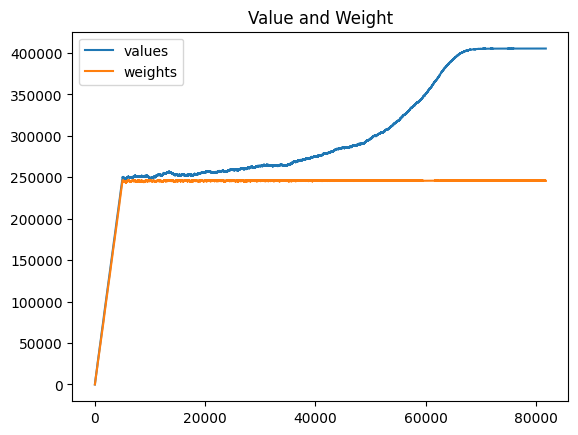

In [106]:
plt.plot(values)
plt.plot(weights)
plt.title('Value and Weight')
plt.legend(['values', 'weights'])
plt.show()

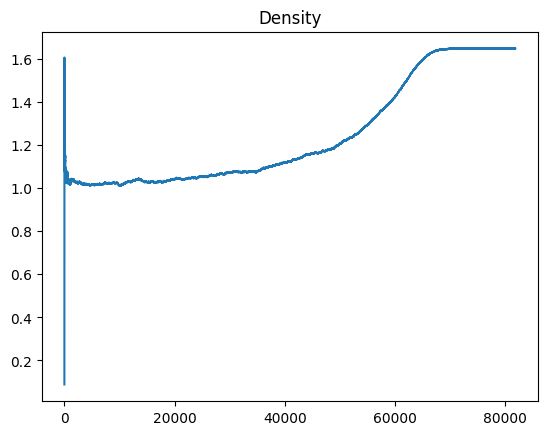

In [107]:
plt.plot(densities)
plt.title('Density')
plt.show()

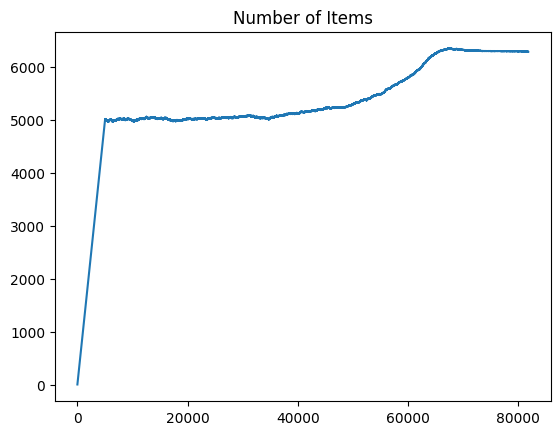

In [108]:
number_of_items = []
count = 0

for index, row in df.iterrows():
    if row['state'] == 'initial' or row['state'] == 'add':
        count += 1
    else:
        count -= 1
    
    number_of_items.append(count)
    
plt.plot(number_of_items)
plt.title('Number of Items')
plt.show()

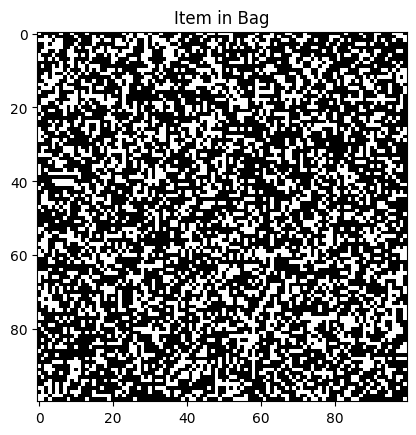

In [92]:
check = np.array([True] * 10000)

for index, row in df.iterrows():
    if row['state'] == 'initial' or row['state'] == 'add':
        check[row['id'] - 1] = False
    else:
        check[row['id'] - 1] = True
    
    # save the image every 100 operations
    if index % 100 != 0:
        continue
    
    reshaped_counts = np.reshape(check, (100, 100))

    plt.title('Item in Bag')
    plt.imshow(reshaped_counts, cmap='gray')
    plt.gcf().set_size_inches(4.8, 4.8)
    
    plt.savefig(f'./images/image_{index:05d}.png')

array([9, 8, 6, ..., 6, 8, 7])

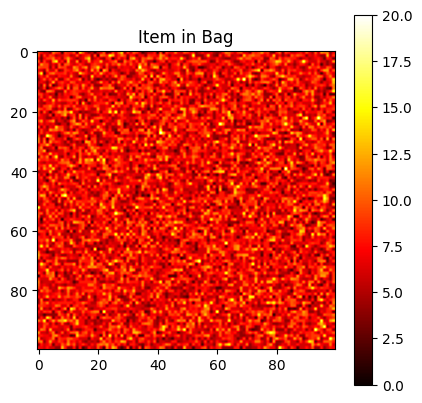

In [133]:
df = pd.read_csv('statistic.csv', names=['state', 'id'], header=0)
check = np.array([0] * 10000)

for index, row in df.iterrows():
    check[row['id'] - 1] += 1
    
    # save the image every 100 operations
    if index % 100 != 0:
        continue
    
    reshaped_counts = np.reshape(check, (100, 100))

    plt.title('Item in Bag')
    plt.imshow(reshaped_counts, cmap='hot', vmin=0, vmax=20)
    if (index == 0):
        plt.colorbar()
    plt.gcf().set_size_inches(4.8, 4.8)
    
    plt.savefig(f'./images_color/image_{index:05d}.png')

In [33]:
import cv2
import os
import numpy as np

# Directory containing images
image_folder = './images_2_color'
# Output video file
video_name = 'output_video_2_color.mp4'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort()

# Read the first image to obtain height and width
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

# Define the codec and create VideoWriter object
# The `cv2.VideoWriter_fourcc` argument specifies the codec. 'XVID' is a common choice but can be changed as needed.
video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'mp4v'), 60, (width, height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()